<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/Lab_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from collections import deque

tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': [],
    'D': [],
    'E': []
}
  # DFS On Tree
def dfs_tree (node, visited):
     if node not in visited:
            print(node)
            visited.add(node)
            for neighbour in tree[node]:
                dfs_tree(neighbour, visited)


print("DFS On Tree")
dfs_tree('A', set())


  # BFS On Tree

def bfs_tree(start):
    visited = []
    queue = deque([start])
    visited.append(start)
    while queue:
        s = queue.popleft()
        print(s, end=" ")

        for neighbour in tree[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

print("\nBFS On Tree")
bfs_tree('A')

  # Now for Graph
graph = {
    'A': ['B', 'C'],
    'B': ['A','C','D', 'E'],
    'C': ['A','B'],
    'D': ['B'],
    'E': ['B']
}


def dfs_graph(node, visited):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs_graph(neighbour, visited)

print("\nDFS On Graph")
dfs_graph('A', set())

    # BFS FOR GRAPH
def bfs_graph(start):
    visited = []
    queue = deque([start])
    visited.append(start)
    while queue:
        s = queue.popleft()
        print(s, end=" ")

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

print("\nBFS On Graph")
bfs_graph('A')

DFS On Tree
A
B
D
E
C

BFS On Tree
A B C D E 
DFS On Graph
A
B
C
D
E

BFS On Graph
A B C D E 

In [29]:
# TASk 2

student = {
    "name" : "Rehman",
    "age" :  22,
    "Reg_No" : "Sp23-bse-123",
    "Grade" : "A",
}

print("Student Information")


for k,v in list(student.items()):
    print(k,v)

student["Grade"] = "C"

student["Email"] = "Rehman@.com"

del student["age"]

print("\n Final Data")
print(student)

Student Information
name Rehman
age 22
Reg_No Sp23-bse-123
Grade A

 Final Data
{'name': 'Rehman', 'Reg_No': 'Sp23-bse-123', 'Grade': 'C', 'Email': 'Rehman@.com'}


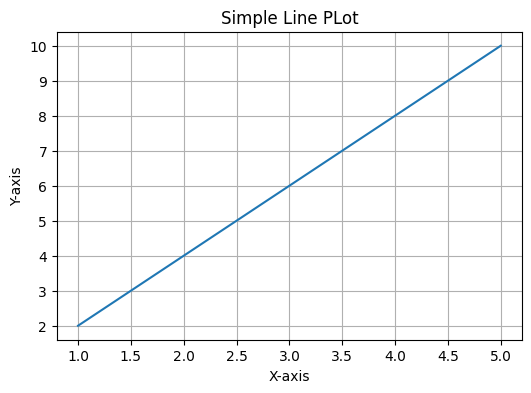

In [30]:
# Task 3

import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.figure(figsize=(6,4))

plt.plot(x, y)

plt.title("Simple Line PLot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


In [31]:
#  Task 4

from collections import deque
import tracemalloc
import time

Cap_A = 4
Cap_B = 3
Goal = 2


def get_neigbours(state):
    a, b = state

    neigoubors = []

    # Fill jug A
    neigoubors.append((Cap_A, b))
    # Fill jug B
    neigoubors.append((a, Cap_B))

    # Empty jug A
    neigoubors.append((0, b))
    # Empty jug B
    neigoubors.append((a, 0))

    # Pour water from A to B
    transfer = min(a, Cap_B - b)
    neigoubors.append((a - transfer, b + transfer))

    # Pour water from B to A
    transfer = min(b, Cap_A - a)
    neigoubors.append((a + transfer, b - transfer))

    # Filter out invalid states (negative amounts or amounts exceeding capacity)
    valid_neigoubors = []
    for next_a, next_b in neigoubors:
        if 0 <= next_a <= Cap_A and 0 <= next_b <= Cap_B:
            valid_neigoubors.append((next_a, next_b))

    return valid_neigoubors


# BFS Implementation

def bfs_water():
    tracemalloc.start()
    start_time = time.perf_counter()

    start = (0, 0)

    queue = deque([start])
    visited = {start}  # Use a set for efficient lookup

    parent = {start: None}

    expanded = 0

    while queue:
        state = queue.popleft()
        expanded += 1
        a, b = state

        if a == Goal or b == Goal:
            end_time = time.perf_counter()
            peak_mem = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            path = []
            current_state = state
            while current_state is not None:
                path.append(current_state)
                current_state = parent[current_state]

            path.reverse()

            return {
                "method": "BFS",
                "path": path,
                "expanded": expanded,
                "time": end_time - start_time,
                "memory": peak_mem
            }

        for neighbour in get_neigbours(state):
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                parent[neighbour] = state

    end_time = time.perf_counter()
    peak_mem = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    return {
        "method": "BFS",
        "path": [],  # No solution found
        "expanded": expanded,
        "time": end_time - start_time,
        "memory": peak_mem
    }

# Solve the problem and display the result
result_bfs = bfs_water()

if result_bfs["path"]:
    print("BFS Solution found:")
    for step in result_bfs["path"]:
        print(step)
    print(f"\nBFS Expanded states: {result_bfs['expanded']}")
    print(f"BFS Time taken: {result_bfs['time']:.6f} seconds")
    print(f"BFS Peak memory usage: {result_bfs['memory']} bytes")
else:
    print("BFS No solution found.")


# DFS Implementation
def dfs_water():
    tracemalloc.start()
    start_time = time.perf_counter()

    start = (0, 0)
    stack = [start]
    parent = {start: None}
    visited = set()

    expanded = 0

    while stack:
        state = stack.pop()
        if state in visited:
            continue
        visited.add(state)

        expanded += 1

        a, b = state

        if a == Goal or b == Goal:
            end_time = time.perf_counter()
            peak_mem = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            path = []
            current_state = state
            while current_state is not None:
                path.append(current_state)
                current_state = parent[current_state]
            path.reverse()

            return {
                "method": "DFS",
                "path": path,
                "expanded": expanded,
                "time": end_time - start_time,
                "memory": peak_mem
            }

        for neighbour in get_neigbours(state):
            if neighbour not in visited:
                stack.append(neighbour)
                parent[neighbour] = state

    end_time = time.perf_counter()
    peak_mem = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()

    return {
        "method": "DFS",
        "path": [],  # No solution found
        "expanded": expanded,
        "time": end_time - start_time,
        "memory": peak_mem
    }

# Solve the problem using DFS and display the result
result_dfs = dfs_water()

if result_dfs["path"]:
    print("\nDFS Solution found:")
    for step in result_dfs["path"]:
        print(step)
    print(f"\nDFS Expanded states: {result_dfs['expanded']}")
    print(f"DFS Time taken: {result_dfs['time']:.6f} seconds")
    print(f"DFS Peak memory usage: {result_dfs['memory']} bytes")
else:
    print("\nDFS No solution found.")

BFS Solution found:
(0, 0)
(0, 3)
(3, 0)
(3, 3)
(4, 2)

BFS Expanded states: 10
BFS Time taken: 0.000182 seconds
BFS Peak memory usage: 2456 bytes

DFS Solution found:
(0, 0)
(0, 3)
(3, 0)
(3, 3)
(4, 2)

DFS Expanded states: 5
DFS Time taken: 0.000133 seconds
DFS Peak memory usage: 1080 bytes


In [32]:
# Task 6

# white = 0
# blue = 1
import heapq

Maze = [
    [0,1,0,0,0,0],
    [0,1,0,1,0,1],
    [0,0,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,0,0,1],
    [1,0,0,0,0,0],
]

start = (0,0)
goal = (5,5)

def heuristic(a,b):
  return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(maze,start,goal):
    rows , cols = len(maze), len(maze[0])

    open_set = []
    heapq.heappush(open_set, (heuristic(start,goal), 0,start))

    came_from = {start:None}
    g_score = {start:0}
    expanded = 0

    dirct = [(-1,0), (1,0), (0,-1), (0,1)]

    while open_set:
      f, g, current = heapq.heappop(open_set)
      expanded += 1

      if current == goal:
        path = []
        while current is not None:
          path.append(current)
          current = came_from[current]

        path.reverse()

        return {
            "path" : path,
            "cost" : g_score[goal],
            "expanded" : expanded
        }

      for dr, dc in dirct:
        neighbor_r, neighbor_c = current[0] + dr, current[1] + dc

        if 0 <= neighbor_r < rows and 0 <= neighbor_c < cols and maze[neighbor_r][neighbor_c] == 0:
            new_g_score = g_score[current] + 1

            if (neighbor_r, neighbor_c) not in g_score or new_g_score < g_score[(neighbor_r, neighbor_c)]:
                g_score[(neighbor_r, neighbor_c)] = new_g_score
                f_score = new_g_score + heuristic((neighbor_r, neighbor_c), goal)
                heapq.heappush(open_set, (f_score, new_g_score, (neighbor_r, neighbor_c)))
                came_from[(neighbor_r, neighbor_c)] = current

    return {
        "path" : [],
        "cost" : -1,
        "expanded" : expanded
    }

# Solve the maze using A* and display the result
result_astar = astar(Maze, start, goal)

if result_astar["path"]:
    print("A* Solution found:")
    for step in result_astar["path"]:
        print(step)
    print(f"\nA* Cost: {result_astar['cost']}")
    print(f"A* Expanded states: {result_astar['expanded']}")
else:
    print("A* No solution found.")

A* Solution found:
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 4)
(4, 4)
(5, 4)
(5, 5)

A* Cost: 10
A* Expanded states: 23
